W tym zadaniu zajmiemy się ekstrakcją melowo-częstotliwościowych współczynników cepstralnych (MFCC).

MFCC to cechy bardzo często ekstrahowane z sygnałów akustycznych z zakresu słyszalnego, głównie sygnału mowy. Uzyskiwane są poprzez filtrację cepstrum (cepstrum - odwrotna transformata Fouriera z widma wyrażonego w skali logarytmicznej) bankiem filtrów trójkątnych. Filtry te są dobrane tak, by w (dużym) przybliżeniu modelować odpowiedź układu słuchowego człowieka na sygnał akustyczny. Rodzielczość częstotliwościowa słuchu jest wyższa dla niskich częstotliwości, a niższa dla wysokich, więc filtry melowe są węższe dla niskich częstotliwości i szersze dla wysokich.

Algorytm ekstrakcji MFCC jest w skórcie opisany np. tutaj: https://sound.eti.pg.gda.pl/student/amowy/AM_07_ASR.pdf (slajdy 8-11).

1. Wyświetl spektrum dowolnego sygnału z poprzedniego zadania (folder dane_testowe).

In [1]:
import os
import numpy as np
from scipy.io.wavfile import read as read_wav
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

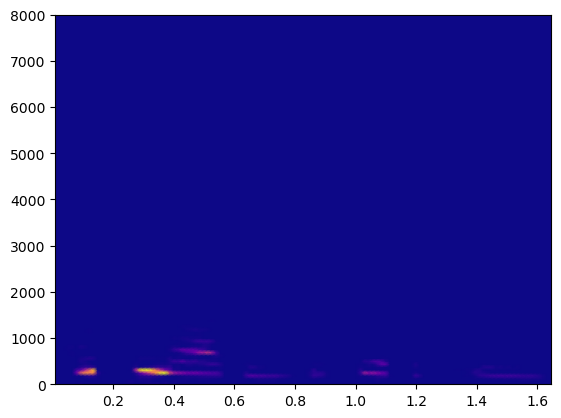

In [2]:
fs, signal = read_wav('/home/student/Desktop/weronika/lab 2/Zadania i pliki-20231017/dane_testowe/dane_testowe/1182-phrase.wav')


f, t, Sxx = spectrogram(signal, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='plasma')

2. Wyznacz MFCC dla tego samego sygnału - poniżej fragment kodu, który możesz użyć.

In [12]:
import librosa

signal, fs = librosa.load('/home/student/Desktop/weronika/lab 2/Zadania i pliki-20231017/dane_testowe/dane_testowe/1182-phrase.wav', sr=None)
#mfcc_20_coeffs = librosa.feature.mfcc(signal.astype(float), sr=fs)
#print(mfcc.shape) #pierwszy wymiar - liczba współczynników MFCC, drugi - liczba ramek sygnału

#signal, fs = librosa.load('dane_testowe/1-phrase.wav', sr=None) #trzeba zdefiniować częstotliwość próbkowania jako None,
# bo inaczej librosa przyjmuje wartość domyślną, czyli 22050 i modyfikuje sygnał przy wczytywaniu

mfcc_20_coeffs = librosa.feature.mfcc(y=signal, sr=fs)

print(mfcc_20_coeffs.shape) #pierwszy wymiar - liczba współczynników MFCC, drugi - liczba ramek sygnału

(20, 52)


Liczba współczynników jest domyślnie ustawiona na 20 i można ją zmienić podając do funkcji argument n_mfcc. Najmniejszą często używaną liczbą współczynników jest 13. 

In [14]:
mfcc_13_coeffs = librosa.feature.mfcc(y=signal, sr=fs, n_mfcc=13)

3. Wyświetl MFCC jako obraz (funkcja imshow()). Porównaj wygląd obu obrazów oraz ich wymiary.

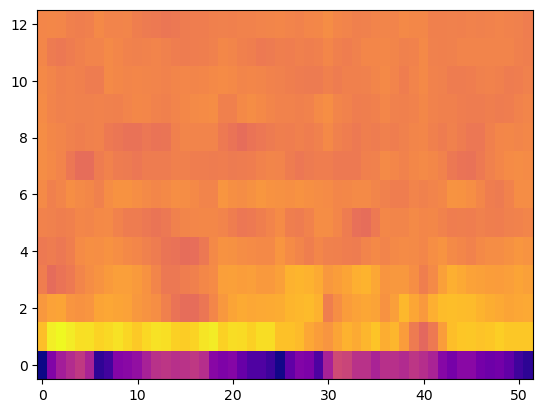

In [15]:
plt.imshow(mfcc_13_coeffs, cmap='plasma', aspect='auto') #aspect=auto powoduje, że kształt pikseli jest inny
                                                        #i zazwyczaj obraz wygląda bardziej czytelnie
plt.gca().invert_yaxis()

4. Wytrenuj klasyfikator analogicznie do zadania 1, ale tym razem na MFCC, a nie na spektrogramach (użyj części kodu z poprzedniego zadania). Pamiętaj o zachowaniu takiego samego podziału sygnałów na zbiory uczący i testowy (w poprzednim zadaniu trzeba było zapisać listę plików w obu zbiorach do plików - możesz ich użyć dla pewności lub zastosować taki sam random_state w funkcji train_test_split).

5. Wylicz metryki sukcesu i oceń, czy zmiana rodzaju użytych cech sygnału ma wpływ na wyniki.